## How does Age affect you at the world cup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import linregress

# File paths
player_shooting_path = "../csv/player_shooting.csv"
player_stats_path = "../csv/player_stats.csv"
player_playing_path ="../csv/player_playingtime.csv"

# Read CSV files
player_stats_df = pd.read_csv(player_stats_path)
player_shooting_df = pd.read_csv(player_shooting_path)
player_playing_df = pd.read_csv(player_playing_path)

In [2]:
player_stats_clean = player_stats_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,24]].copy()

In [3]:
player_shooting_clean = player_shooting_df.iloc[:,[0,7,8,9,10,12]].copy()

In [4]:
player_playing_clean = player_playing_df.iloc[:,[0,7, 11,13]].copy()
list(player_playing_clean)

['player', 'minutes_per_game', 'minutes_per_start', 'games_subs']

In [5]:
# Merge dataframes using the 'player' column as the common key
merged_df = pd.merge(player_stats_clean, player_shooting_clean, on="player", how="inner")
merged_df = pd.merge(merged_df, player_playing_clean, on="player", how="inner")


# Save the merged dataframe to a new CSV file
merged_df.to_csv("merged_player_data.csv", index=False)

# Display the merged dataframe
merged_df_complete = pd.DataFrame(merged_df)
merged_df_complete

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,xg,xg_assist,shots,shots_on_target,shots_on_target_pct,shots_per90,goals_per_shot,minutes_per_game,minutes_per_start,games_subs
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.1,1,0,0.0,0.25,0.00,90.0,90.0,0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,1,0,0.0,0.34,0.00,89.0,89.0,0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.1,0.9,3,0,0.0,1.49,0.00,36.0,55.0,3
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.3,0.0,6,0,0.0,2.00,0.00,90.0,90.0,0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.4,0.0,2,1,50.0,2.65,0.00,17.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,Juventus,1988,5,4,288,3.2,...,0.8,0.6,6,3,50.0,1.87,0.17,58.0,70.0,1
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,1998,3,3,264,2.9,...,0.1,0.4,4,0,0.0,1.36,0.00,88.0,88.0,0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,1998,4,4,347,3.9,...,0.2,0.0,5,1,20.0,1.30,0.00,87.0,87.0,0
678,Óscar Duarte,DF,Costa Rica,33-198,Al-Wehda,1989,3,3,270,3.0,...,0.0,0.3,0,0,NaN,0.00,NaN,90.0,90.0,0


In [15]:
#Average age of players of who received yellow and red cards
# Calculate the average age of players per team 
players_yellow_cards_per_team = merged_df_complete.groupby('team')['cards_yellow'].count().round(1).reset_index()

# Rename age column
players_yellow_cards_per_team = players_yellow_cards_per_team.rename(columns={'cards_yellow': 'total yellow cards per team'})

# Display the result
players_yellow_cards_per_team

,team,total yellow cards per team
0,Argentina,24
1,Australia,20
2,Belgium,20
3,Brazil,26
4,Cameroon,22
5,Canada,19
6,Costa Rica,22
7,Croatia,21
8,Denmark,20
9,Ecuador,18


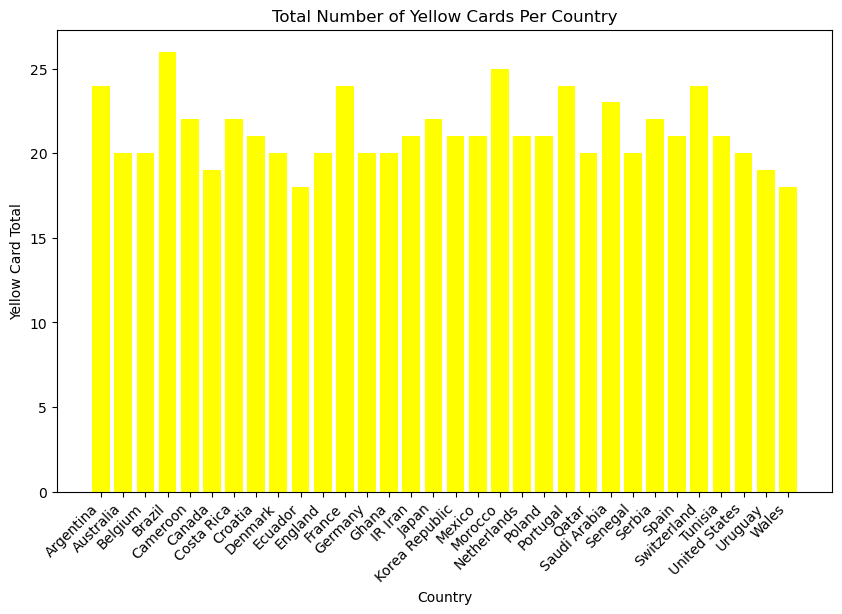

In [88]:
# Plot a bar chart for average age of players per team 
plt.figure(figsize=(10, 6))
plt.bar(players_yellow_cards_per_team['team'], players_yellow_cards_per_team['total yellow cards per team'],facecolor='yellow')
plt.title('Total Number of Yellow Cards Per Country')
plt.xlabel('Country')
plt.ylabel('Yellow Card Total')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [21]:
#Player,Age,yellow card count
player_yellow_card_df = merged_df_complete[['player', 'cards_yellow','age']]
#Display DF
player_yellow_card_df

,player,cards_yellow,age
0,Aaron Mooy,1,33
1,Aaron Ramsey,1,33
2,Abdelhamid Sabiri,1,27
3,Abdelkarim Hassan,0,30
4,Abderrazak Hamdallah,0,33
...,...,...,...
675,Ángel Di María,0,35
676,Ángelo Preciado,0,25
677,Éder Militão,1,25
678,Óscar Duarte,1,34


In [29]:
# Calculate the average age of players yellow card count
Average_players_age_per_yellow_card_count = player_yellow_card_df.groupby('cards_yellow')['age'].mean().round(1).reset_index()


Average_players_age_per_yellow_card_count

,cards_yellow,age
0,0,27.9
1,1,28.6
2,2,28.4
3,3,29.0


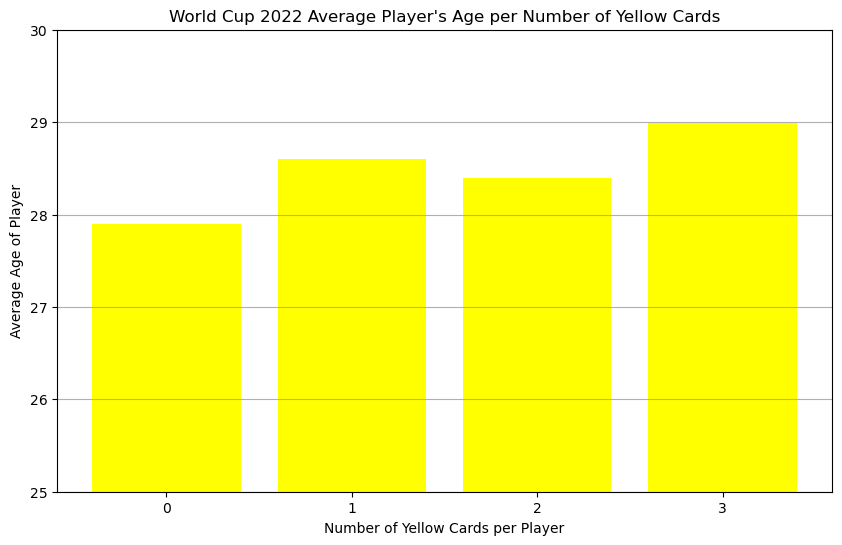

Number of players with at least one yellow card: 195


In [93]:
plt.figure(figsize=(10, 6))
plt.bar(Average_players_age_per_yellow_card_count['cards_yellow'], Average_players_age_per_yellow_card_count['age'], facecolor='yellow')
plt.grid(axis='y')
plt.title("World Cup 2022 Average Player's Age per Number of Yellow Cards")
plt.xlabel('Number of Yellow Cards per Player')
plt.ylabel('Average Age of Player')
plt.xticks(np.arange(0, 4, 1))
plt.ylim(25, 30)
plt.show()
print("Number of players with at least one yellow card:", players_with_yellow_card)

In [97]:
players_with_yellow_card = player_yellow_card_df['cards_yellow'].gt(1).sum()
print("Number of players with at least one yellow card:", players_with_yellow_card)

Number of players with at least one yellow card: 29


In [55]:
#Player,Age,red card count
player_red_card_df = merged_df_complete[['player', 'cards_red','age']]

#Display DF
player_red_card_df

,player,cards_red,age
0,Aaron Mooy,0,33
1,Aaron Ramsey,0,33
2,Abdelhamid Sabiri,0,27
3,Abdelkarim Hassan,0,30
4,Abderrazak Hamdallah,0,33
...,...,...,...
675,Ángel Di María,0,35
676,Ángelo Preciado,0,25
677,Éder Militão,0,25
678,Óscar Duarte,0,34


In [57]:
Average_players_age_per_red_card_count = player_red_card_df.groupby('cards_red')['age'].mean().round(1).reset_index()


Average_players_age_per_red_card_count

,cards_red,age
0,0,28.1
1,1,29.8


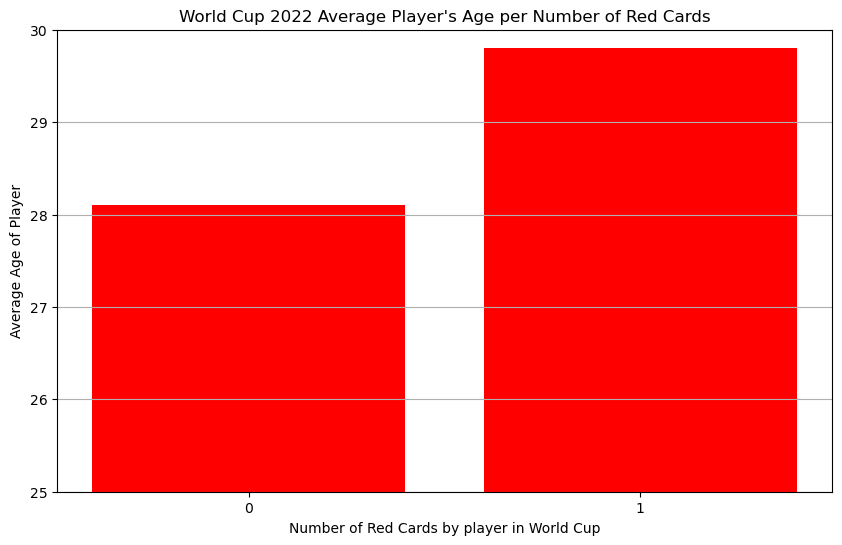

Total number of players given red cards: 4


In [86]:
plt.figure(figsize=(10, 6))
plt.bar(Average_players_age_per_red_card_count['cards_red'], Average_players_age_per_red_card_count['age'],facecolor='red')
plt.grid(axis='y')
plt.title("World Cup 2022 Average Player's Age per Number of Red Cards")
plt.xlabel('Number of Red Cards by player in World Cup')
plt.ylabel('Average Age of Player')
plt.xticks(np.arange(0, 2, 1))
plt.ylim(25, 30)

plt.show()
print("Total number of players given red cards: 4")

In [59]:
total_red_cards = player_red_card_df['cards_red'].sum()
print("Total Red Cards:", total_red_cards)

Total Red Cards: 4
